# Chapter 5 - Exercise 2
### Author: *John Benedick Estrada*
---
**Exercise:** This exercise asks you to experiment with Rule 110 and see how
many spaceships you can find.

1. Read the [Wikipedia page about Rule 110](https://en.wikipedia.org/wiki/Rule_110), which describes its background pattern and spaceships.

2. Create a Rule 110 CA with an initial condition that yields the
  stable background pattern.  Note that the CA class provides
`start_string`, which allow you to initialize the state of
the array using a string of `1`s and `0`s.

3. Modify the initial condition by adding different patterns in the
  center of the row and see which ones yield spaceships.  You might
  want to enumerate all possible patterns of $n$ bits, for some
  reasonable value of $n$.  For each spaceship, can you find the
  period and rate of translation?  What is the biggest spaceship you
  can find?

4. What happens when spaceships collide?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Cell1D import Cell1D, make_table

In [2]:
def draw_rule110(init_str, row, col):
    rule110 = Cell1D(rule=110, n=row, m=col)
    rule110.start_string(init_str)

    for _ in range(row-1):
        rule110.step()

    rule110.draw()

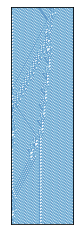

In [3]:
p0 = "00010011011111"   # Background pattern
p1 = "0001110111"       # 
p2 = "1001111"
p3 = "111"

pattern_table = [p0, p1, p2, p3]

pattern_idx = [0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0]
init_str = "".join(map(pattern_table.__getitem__, pattern_idx))
draw_rule110(init_str, row=500, col=len(init_str))